## K Means Clustering

K Means Clustering é um algoritmo de aprendizagem sem supervisão que tenta agrupar dados com base em sua similaridade. A aprendizagem não supervisionada significa que não há resultados a serem previstos, e o algoritmo apenas tenta encontrar padrões nos dados. No K means clustering temos a especificar o número de clusters nos quais os dados devem ser agrupados. O algoritmo atribui aleatoriamente cada observação a um cluster e encontra o centróide de cada cluster. Então, o algoritmo itera através de duas etapas:
Reatribui pontos ao cluster cujo centroide é o mais próximo e calcula o novo centróide de cada cluster. Estes dois passos são repetidos até que a variação dentro do cluster não possa ser mais reduzida. A variação dentro do cluster é calculada como a soma da distância euclidiana entre os pontos de dados e seus respectivos centroides do cluster.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Criar dados

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=50)

In [4]:
type(data)

tuple

In [5]:
len(data)

2

## Visualizando os dados data

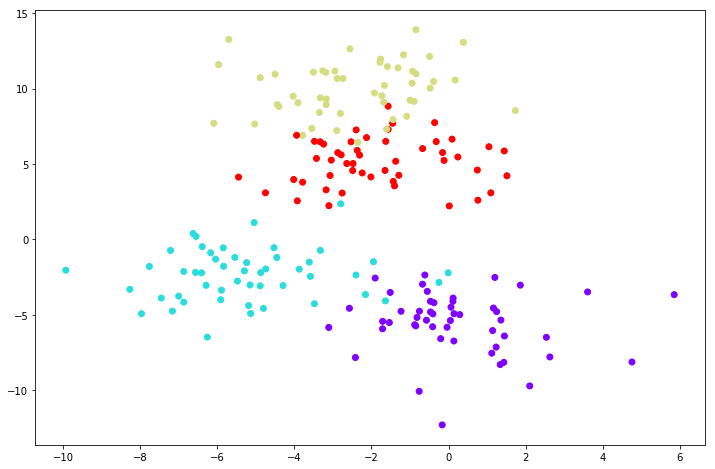

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Criando os clusters

In [7]:
from sklearn.cluster import KMeans

In [8]:
#n_clusters=4 por causa da vizualização dos dados acima
#Para encontrar o melhor numero de clusters utilizar o método do cotovelo
kmeans = KMeans(n_clusters=4)

In [9]:
# Como é um algoritmos não supervisionado não é necessária a divisão entre dados de treino e de teste
# Pode-se utilizar para o treino todos os dados

In [10]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.cluster_centers_

array([[-1.94847438,  5.20472404],
       [ 0.11584155, -5.37562512],
       [-2.37178661, 10.27788487],
       [-5.64892498, -2.38445033]])

In [12]:
kmeans.labels_

array([2, 1, 0, 2, 3, 1, 2, 1, 1, 3, 3, 2, 3, 0, 3, 0, 2, 2, 3, 3, 3, 0,
       2, 2, 2, 0, 2, 1, 0, 2, 2, 3, 3, 1, 1, 3, 3, 3, 0, 0, 2, 3, 0, 0,
       1, 1, 2, 0, 0, 2, 1, 3, 0, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 1, 1, 2,
       1, 0, 2, 2, 1, 3, 0, 1, 0, 0, 3, 0, 0, 1, 3, 0, 3, 3, 3, 3, 2, 1,
       2, 3, 1, 2, 1, 0, 0, 3, 1, 0, 1, 0, 3, 1, 0, 2, 0, 1, 0, 1, 3, 2,
       1, 3, 2, 2, 3, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 3, 1,
       1, 0, 2, 0, 1, 2, 2, 3, 2, 0, 0, 1, 3, 2, 1, 0, 1, 3, 2, 3, 0, 1,
       1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 3, 0, 1, 0,
       3, 1, 2, 0, 1, 0, 0, 2, 3, 1, 3, 2, 0, 1, 0, 0, 3, 0, 1, 2, 3, 0,
       3, 2])

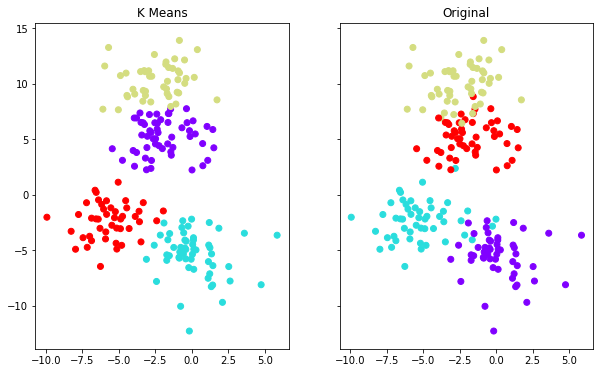

In [13]:
#As cores não têm relação entre os dois graficos
#Experimentar mudar o n_clusters
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Escolhendo um valor de n

Vamos em frente e usar o método do cotovelo para escolher um bom Valor de n:

Text(0, 0.5, 'SEQ')

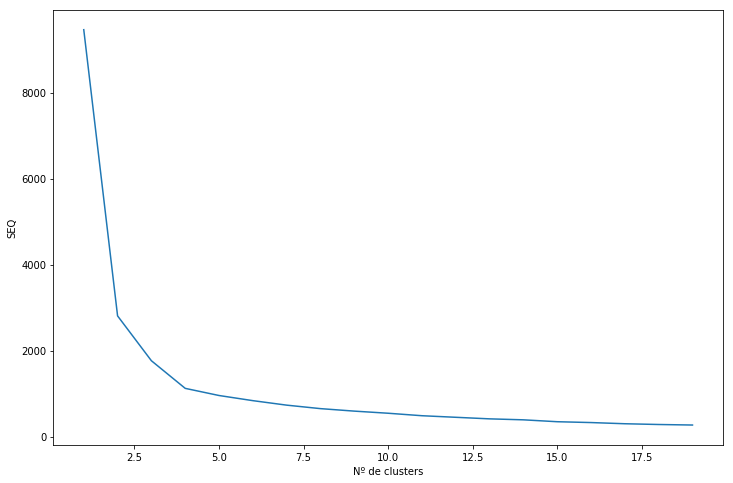

In [14]:

# O km.inertia_ retorna a soma do quadrado das distâncias das amostras ao seu centroide mais proximo(quanto menor for a inercia
# melhor, esta varia desde 0 até infinito.

seq = {}
 
for i in range(1,20):
    km = KMeans(n_clusters=i, max_iter=1000).fit(data[0])
    seq[i] = km.inertia_ 

plt.figure(figsize=(12,8))
plt.plot(list(seq.keys()),list(seq.values()))
plt.xlabel('Nº de clusters')
plt.ylabel('')